# CHILD Asthma Prediction 
    - Pipeline for multiple time points: Birth, 6m, 1y, 2y, 3y 
    - Identification of critical, stable predictors
    - Identification of minimal set of features 
    - Asthma Risk Stratification Model (0 - No risk, 1 - Minimal risk, 2 - Intermediate risk, 3 - High risk)

In [62]:
# Preferences of autoformatting & Multiple Output
%load_ext nb_black

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import warnings

warnings.filterwarnings("ignore")

import researchpy as rp  # For auto-statistics/EDA of dataframe
from tqdm.notebook import tqdm  # For process display

import sys

sys.path.append("../src")

from data import *
from utils import *
from conf import *
from tools import *

import utils as UT

import random

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [15]:
df_raw = generate_raw_xlsx()

The path for all the CHILD data is located at ../data/
Generating a merged DataFrame For Analyzing and Modelling...
The DataFrame for ML is saved to ../output 


<IPython.core.display.Javascript object>

In [16]:
!ls ../output/

CHILD_ml_sample_dataset.xlsx        targeted_raw_child.xlsx
CHILD_raw.xlsx                      unprocessed_targeted_raw_child.xlsx
CHILD_with_addon.xlsx


<IPython.core.display.Javascript object>

In [118]:
df_raw.Epi_Noncold_Wheeze_3m

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3450    0.0
3451    0.0
3452    0.0
3453    0.0
3454    0.0
Name: Epi_Noncold_Wheeze_3m, Length: 3455, dtype: float64

<IPython.core.display.Javascript object>

In [19]:
df_raw.columns.values
len(df_raw.columns.values)

array(['Subject_Number', 'Gender', 'Gest_Days', 'Weight_0m', 'Weight_3m',
       'Weight_12m', 'Weight_36m', 'Weight_60m', 'Weight_for_age_0m',
       'Weight_for_age_3m', 'Weight_for_age_12m', 'Weight_for_age_36m',
       'Weight_for_age_60m', 'Number_of_AntibioticsCourse',
       'Time_of_AntibioticsUsage', 'Antibiotics_Usage', 'No_of_Pregnancy',
       'Anesthetic_delivery', 'Analgesics_usage_delivery',
       'Mode_of_delivery', 'Apgar_Score_1min', 'Apgar_Score_5min',
       'Respiratory_Problems_Birth', 'Jaundice_Birth',
       'Complications_Birth', 'Stay_Duration_Hospital', 'Study_Center',
       'Prenatal_Bleeding', 'Prenatal_Nausea', 'Prenatal_Infections',
       'Prenatal_Induced_Hypertension', 'Prenatal_Gestational_Diabetes',
       'Prenatal_Cardiac_Disorder', 'Prenatal_Hypertension',
       'Prenatal_Hypotension', 'Prenatal_None_Conditions',
       'Prenatal_Other_Conditions', 'F10min_Intubation',
       'F10min_Mask_Ventilation', 'F10min_Free_Flow_Oxygen',
       'F10min_

166

<IPython.core.display.Javascript object>

In [95]:
df_raw.select_dtypes(include="object")

,Gender,Study_Center,Respiratory_Report_Months,Respiratory_Infections,Severity_of_Respiratoryinfections,Mother_Condition_Delivery,First_10min_Measure
0,F,NaN,"[nan, nan, 9.790554414784395, 12.5503080082135...","[nan, nan, 'No', 'No', 'No', 'No', 'No', 'No',...","[nan, nan, 'No', 'No', 'No', 'No', 'No', 'No',...",NaN,NaN
1,M,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan]",NaN,NaN
2,F,NaN,"[nan, nan, nan, nan, nan, nan, nan, 15.7371663...","[nan, nan, nan, nan, nan, nan, nan, 'LRTI', 'L...","[nan, nan, nan, nan, nan, nan, nan, nan, 'Mild']",NaN,NaN
3,F,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, 6.373...","[nan, nan, nan, nan, nan, nan, nan, nan, 'No']","[nan, nan, nan, nan, nan, nan, nan, nan, 'No']",NaN,NaN
4,F,NaN,"[nan, nan, nan, 5.946611909650924, 10.71047227...","[nan, nan, nan, 'URTI', 'No', 'No', 'URTI', 'L...","[nan, nan, nan, nan, 'No', 'No', 'Mild', 'Mild...",NaN,NaN
...,...,...,...,...,...,...,...
3450,M,Toronto,"[nan, nan, nan, nan, 3.4496919917864473, 28.02...","[nan, nan, nan, nan, 'No', 'No', 'No', 'No', '...","[nan, nan, nan, nan, 'No', 'No', 'No', 'No', '...",None,None
3451,M,Toronto,"[3.351129363449692, 6.373716632443532, 13.1088...","['No', 'No', 'URTI', 'LRTI', 'URTI', 'URTI', '...","['No', 'No', 'Mild', 'Mild', 'Mild', 'Moderate...",Other,None
3452,F,Toronto,"[nan, nan, nan, 2.8254620123203287, 5.65092402...","[nan, nan, nan, 'No', 'No', 'LRTI', 'LRTI', 'N...","[nan, nan, nan, 'No', 'No', 'Mild', 'Mild', 'N...",Other,None
3453,F,Toronto,"[nan, nan, nan, nan, 3.055441478439425, 7.1293...","[nan, nan, nan, nan, 'No', 'No', 'LRTI', 'No',...","[nan, nan, nan, nan, 'No', 'No', 'Mild', 'No',...",None,Suction while in warmer


<IPython.core.display.Javascript object>

## Reproduce previous performance

In [168]:
df_previous = df_raw[
    [
        "Gender",
        "Mode_of_delivery",
        "Anesthetic_delivery",
        "Prolonged_Expiration_1yCLA",
        "Crackles_1yCLA",
        "Wheeze_1yCLA",
        "Mother_Asthma",
        "Father_Asthma",
        "Parental_Asthma",
        "Mom_Atopy",
        #        "Mom_Inhalant",
        "Wheeze_Mother",
        "Hayfever_Mother",
        "Pollentress_Mother",
        "FAllergies_Mother",
        "Wheeze_Father",
        "Hayfever_Father",
        "AD_Father",
        "Pollentress_Father",
        "Number_of_AntibioticsCourse",
        "Antibiotics_Usage",
        #        "Home_DEHP_3m",
        "Gest_Days",
        "Apgar_Score_5min",
        #         "Epi_Noncold_Wheeze_3m",
        "Asthma_Diagnosis_5yCLA",
    ]
]

<IPython.core.display.Javascript object>

In [169]:
df_previous_5y = df_previous[df_previous.Asthma_Diagnosis_5yCLA.notna()]

<IPython.core.display.Javascript object>

In [170]:
df_previous_5y

,Gender,Mode_of_delivery,Anesthetic_delivery,Prolonged_Expiration_1yCLA,Crackles_1yCLA,Wheeze_1yCLA,Mother_Asthma,Father_Asthma,Parental_Asthma,Mom_Atopy,...,FAllergies_Mother,Wheeze_Father,Hayfever_Father,AD_Father,Pollentress_Father,Number_of_AntibioticsCourse,Antibiotics_Usage,Gest_Days,Apgar_Score_5min,Asthma_Diagnosis_5yCLA
53,F,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,276.0,9.0,0.0
54,M,8.0,1.0,NaN,NaN,NaN,1.0,0.0,1.0,NaN,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,292.0,6.0,0.0
55,M,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,9.0,0.0
56,F,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,279.0,10.0,0.0
57,M,1.0,1.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,273.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,M,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,281.0,9.0,2.0
3450,M,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,275.0,9.0,0.0
3451,M,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,272.0,9.0,1.0
3453,F,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,275.0,9.0,0.0


<IPython.core.display.Javascript object>

In [171]:
# For numerical col, mean will be used to fill NaN
for col in [
    "Gest_Days",
    #            "Home_DEHP_3m"
]:
    df_previous_5y[col] = df_previous_5y[col].fillna(df_previous_5y[col].mean())

# For categorical columns, 0 (negative) will be used to fill NaN
for col in set(df_previous_5y.columns.to_list()) - set(
    [
        "Gest_Days",
        #     "Home_DEHP_3m",
        "Apgar_Score_5min",
        "Asthma_Diagnosis_5yCLA",
    ]
):
    df_previous_5y[col] = df_previous_5y[col].fillna(value=0)

df_previous_5y.Apgar_Score_5min = df_previous_5y.Apgar_Score_5min.fillna(9)
df_previous_5y.Gender = df_previous_5y.Gender.replace({"F": 0, "M": 1})
df_previous_5y.Mode_of_delivery = df_previous_5y.Mode_of_delivery.replace(
    {6: 0, 7: 0, 8: 0, 9: 0, 1: 1, 2: 1, 3: 1, 4: 1, 11: 1}
)

<IPython.core.display.Javascript object>

In [172]:
df_previous_5y.Asthma_Diagnosis_5yCLA.value_counts()

0.0    2234
2.0     247
1.0     165
Name: Asthma_Diagnosis_5yCLA, dtype: int64

<IPython.core.display.Javascript object>

In [173]:
df_previous_ml = df_previous_5y[df_previous_5y.Asthma_Diagnosis_5yCLA != 2]

<IPython.core.display.Javascript object>

In [174]:
df_previous_ml

,Gender,Mode_of_delivery,Anesthetic_delivery,Prolonged_Expiration_1yCLA,Crackles_1yCLA,Wheeze_1yCLA,Mother_Asthma,Father_Asthma,Parental_Asthma,Mom_Atopy,...,FAllergies_Mother,Wheeze_Father,Hayfever_Father,AD_Father,Pollentress_Father,Number_of_AntibioticsCourse,Antibiotics_Usage,Gest_Days,Apgar_Score_5min,Asthma_Diagnosis_5yCLA
53,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,276.0,9.0,0.0
54,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,292.0,6.0,0.0
55,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,9.0,0.0
56,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,279.0,10.0,0.0
57,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,273.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,280.0,9.0,0.0
3450,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,9.0,0.0
3451,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,272.0,9.0,1.0
3453,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,275.0,9.0,0.0


<IPython.core.display.Javascript object>

In [128]:
df_previous_ml.Anesthetic_delivery.value_counts()

1.0    1886
0.0     513
Name: Anesthetic_delivery, dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
df.Mom_Inhalant

<Figure size 864x720 with 0 Axes>

<AxesSubplot:>

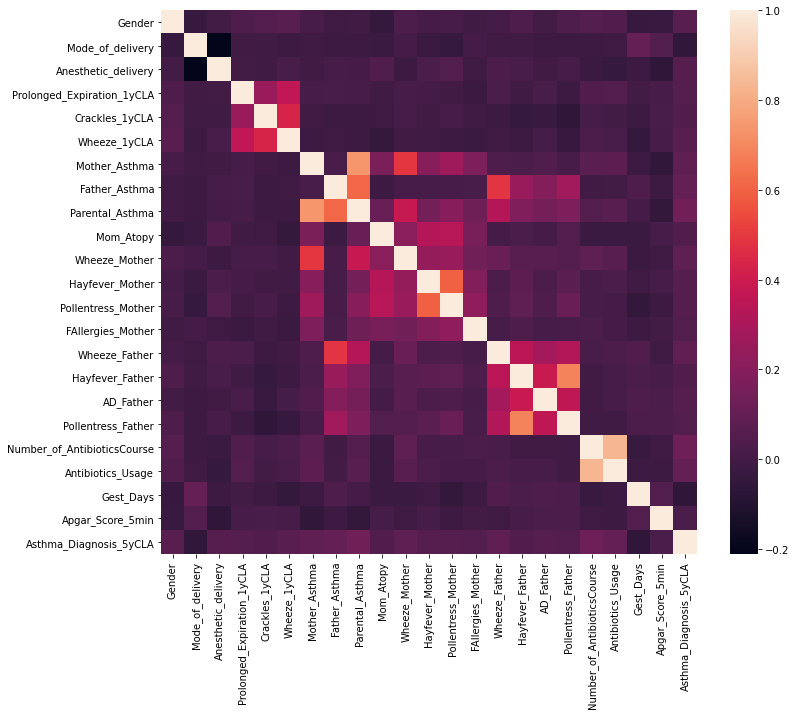

<IPython.core.display.Javascript object>

In [175]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_previous_ml.corr())

In [188]:
X_test.Apgar_Score_5min.value_counts()

9.0     45
8.0      3
10.0     1
7.0      1
Name: Apgar_Score_5min, dtype: int64

<IPython.core.display.Javascript object>

In [471]:
df

,Gender,Mode_of_delivery,Anesthetic_delivery,Prolonged_Expiration_1yCLA,Crackles_1yCLA,Wheeze_1yCLA,Mother_Asthma,Father_Asthma,Parental_Asthma,Mom_Atopy,...,FAllergies_Mother,Wheeze_Father,Hayfever_Father,AD_Father,Pollentress_Father,Number_of_AntibioticsCourse,Antibiotics_Usage,Gest_Days,Apgar_Score_5min,y
53,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,276.0,9.0,0.0
54,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,292.0,6.0,0.0
55,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,9.0,0.0
56,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,279.0,10.0,0.0
57,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,273.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,280.0,9.0,0.0
3450,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,9.0,0.0
3451,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,272.0,9.0,1.0
3453,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,275.0,9.0,0.0


<IPython.core.display.Javascript object>

(41, 23)

(89, 23)

,Gender,Mode_of_delivery,Anesthetic_delivery,Prolonged_Expiration_1yCLA,Crackles_1yCLA,Wheeze_1yCLA,Mother_Asthma,Father_Asthma,Parental_Asthma,Mom_Atopy,...,FAllergies_Mother,Wheeze_Father,Hayfever_Father,AD_Father,Pollentress_Father,Number_of_AntibioticsCourse,Antibiotics_Usage,Gest_Days,Apgar_Score_5min,y
291,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,292.0,9.0,0.0
1778,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,266.0,9.0,0.0
639,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,9.0,0.0
1779,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,273.0,9.0,0.0
325,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,271.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,268.0,9.0,1.0
1054,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,3.0,1.0,283.0,9.0,1.0
1922,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,287.0,9.0,1.0
3165,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,280.0,9.0,1.0


(2053, 23)

0.0    124
1.0    124
Name: y, dtype: int64

Index(['Gender', 'Mode_of_delivery', 'Anesthetic_delivery',
       'Prolonged_Expiration_1yCLA', 'Crackles_1yCLA', 'Wheeze_1yCLA',
       'Mother_Asthma', 'Father_Asthma', 'Parental_Asthma', 'Mom_Atopy',
       'Wheeze_Mother', 'Hayfever_Mother', 'Pollentress_Mother',
       'FAllergies_Mother', 'Wheeze_Father', 'Hayfever_Father', 'AD_Father',
       'Pollentress_Father', 'Number_of_AntibioticsCourse',
       'Antibiotics_Usage', 'Gest_Days', 'Apgar_Score_5min'],
      dtype='object')

0.0    25
1.0    25
Name: y, dtype: int64

confussion matrix
[[16  9]
 [ 9 16]]


Precison of Logistic Regression: 64.0 

              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64        25
         1.0       0.64      0.64      0.64        25

    accuracy                           0.64        50
   macro avg       0.64      0.64      0.64        50
weighted avg       0.64      0.64      0.64        50



array([[ 0.38232339, -0.76531574,  1.05617805, -0.01655778,  0.20030248,
         0.59361903,  0.88306867,  0.0644493 ,  0.32262152,  0.38462238,
         0.06861233,  0.83548378, -0.38509503,  0.46542487,  0.02043461,
         0.57310761,  0.21664569,  0.12913826,  0.4024833 ,  0.54415428,
        -0.59775802,  0.2734554 ]])

<Figure size 2400x1600 with 0 Axes>

<AxesSubplot:xlabel='Logistic Regression Coefficient'>

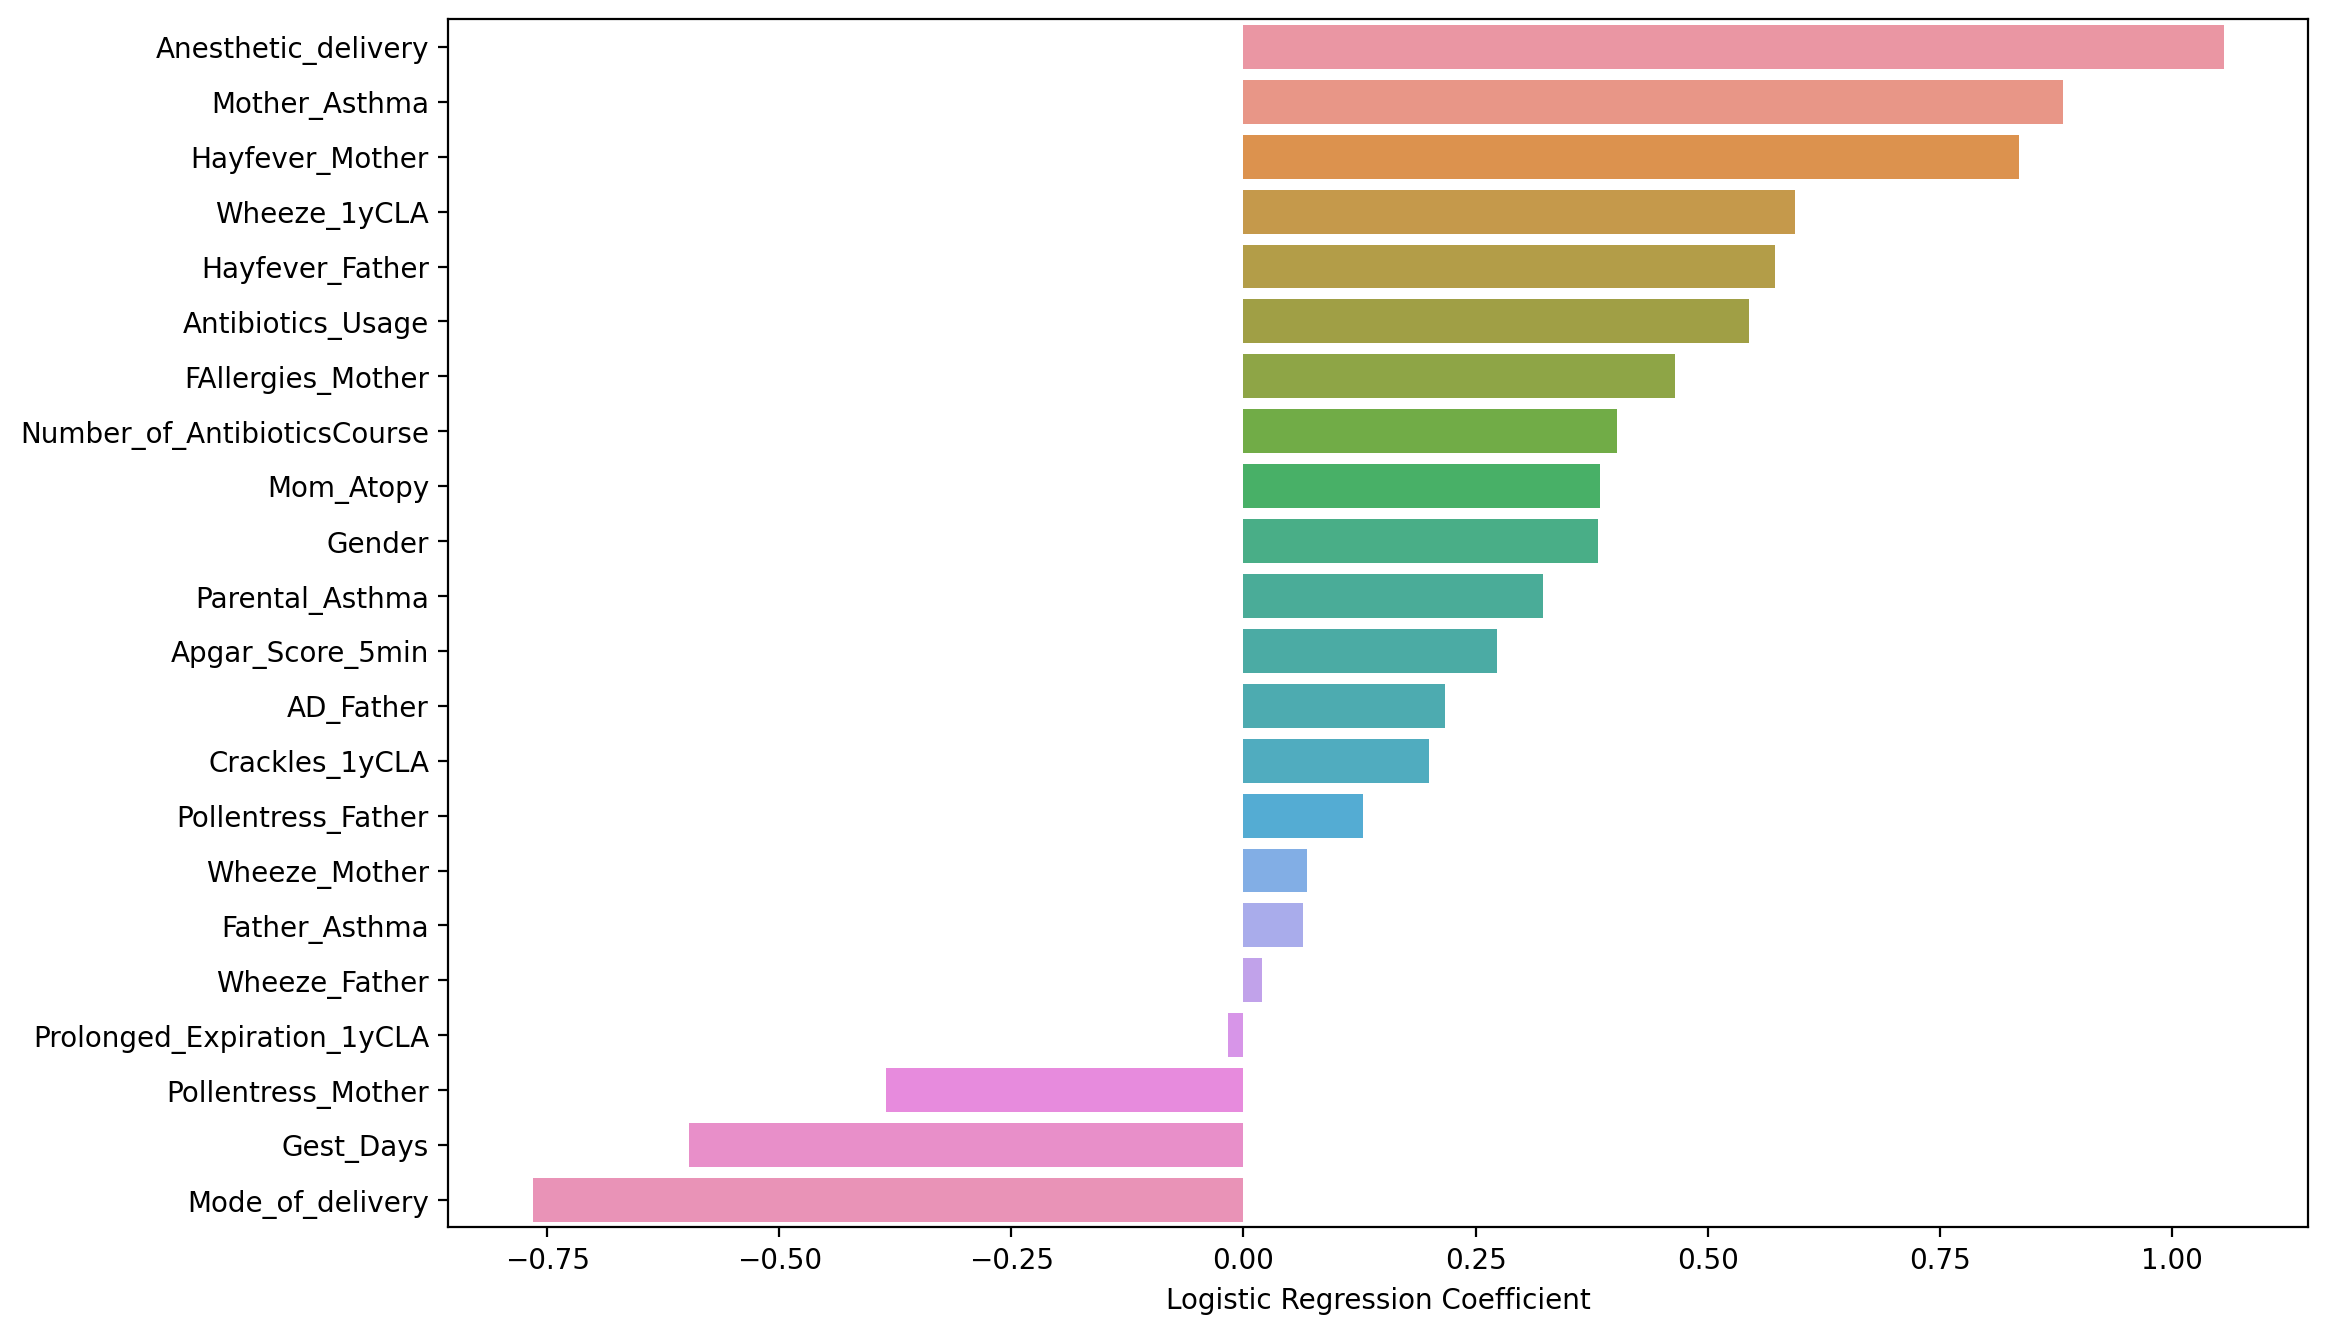

<IPython.core.display.Javascript object>

In [473]:
df = df_previous_ml.rename(columns={"Asthma_Diagnosis_5yCLA": "y"}).copy()


# Holdout for test
holdout_df_withtarget1 = df[df.y == 1].sample(frac=0.25, replace=False, random_state=1)
holdout_df_withtarget1.shape
holdout_df_withtarget0 = df[df.y == 0].sample(frac=0.04, replace=False, random_state=1)
holdout_df_withtarget0.shape
holdout_df = pd.concat([holdout_df_withtarget0, holdout_df_withtarget1])
holdout_df

# Define X and y
df_rest = pd.concat(
    [df, holdout_df_withtarget1, holdout_df_withtarget0]
).drop_duplicates(keep=False)
df_rest.shape

X = df_rest.drop("y", 1)
y = df_rest.y

X = pd.DataFrame(
    MinMaxScaler().fit_transform(X), columns=X.columns, index=X.index,
).copy()

# Undersampling
from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy="majority", random_state=1)
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)
y_under.value_counts()


# Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    roc_curve,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.inspection import permutation_importance

X_train, X_test, y_train, y_test = train_test_split(
    X_under, y_under, test_size=0.2, stratify=y_under, random_state=0
)
X_train.columns
y_test.value_counts()


m1 = "Logistic Regression"
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_prec_score = precision_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Precison of Logistic Regression:", lr_prec_score * 100, "\n")
print(classification_report(y_test, lr_predict))
lr.coef_


features_imp = lr.coef_.reshape((-1, 1))
imp_features = pd.DataFrame(
    index=X.columns, data=features_imp, columns=["Logistic Regression Coefficient"]
)
imp_features.sort_values(
    "Logistic Regression Coefficient", ascending=False, inplace=True
)
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(
    data=imp_features,
    y=imp_features.index,
    x=imp_features["Logistic Regression Coefficient"],
)

In [191]:
features_imp = lr.coef_.reshape((-1, 1))
imp_features = pd.DataFrame(
    index=X.columns, data=features_imp, columns=["Logistic_Regression_Coefficient"]
)
imp_features
# imp_features.sort_values(
#     "Logistic Regression Coefficient", ascending=False, inplace=True
# )
# plt.figure(figsize=(12, 8), dpi=200)
# sns.barplot(
#     data=imp_features,
#     y=imp_features.index,
#     x=imp_features["Logistic Regression Coefficient"],
# )

,Logistic_Regression_Coefficient
Gender,0.578974
Mode_of_delivery,-0.437102
Anesthetic_delivery,0.957099
Prolonged_Expiration_1yCLA,0.146079
Crackles_1yCLA,0.435903
Wheeze_1yCLA,0.486209
Mother_Asthma,0.161496
Father_Asthma,0.390524
Parental_Asthma,0.447102
Mom_Atopy,0.101215


<IPython.core.display.Javascript object>

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy="minority")
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

y_over.value_counts()
X_over_test, y_over_test = oversample.fit_resample(X_test, y_test)

In [278]:
from sklearn.metrics import plot_confusion_matrix

<IPython.core.display.Javascript object>

# Logistic Regression

confussion matrix
[[16  9]
 [ 9 16]]


Precison of Logistic Regression: 64.0 

              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64        25
         1.0       0.64      0.64      0.64        25

    accuracy                           0.64        50
   macro avg       0.64      0.64      0.64        50
weighted avg       0.64      0.64      0.64        50



array([[ 3.55034380e-01, -7.75954112e-01,  1.05000059e+00,
        -9.48156645e-04,  2.02395241e-01,  5.48863085e-01,
         8.66144583e-01,  7.33722333e-02,  3.14125849e-01,
         3.49464330e-01,  7.46805574e-02,  8.27052580e-01,
        -3.69214243e-01,  4.73467138e-01,  2.98914559e-02,
         6.42432264e-01,  2.16333992e-01,  1.16133432e-01,
         3.11115287e-01,  2.76195860e-01, -2.08320810e-02,
         4.05469836e-01]])

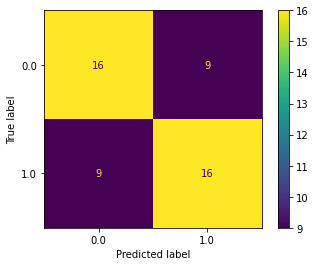

<IPython.core.display.Javascript object>

In [279]:
m1 = "Logistic Regression"
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_prec_score = precision_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Precison of Logistic Regression:", lr_prec_score * 100, "\n")
print(classification_report(y_test, lr_predict))
lr.coef_
plot_confusion_matrix(lr, X_test, y_test)

In [292]:
dict_confusion

{'lr':                    Predict_No_Asthma  Predict_Has_Asthma
 Actual_No_Asthma                  16                   9
 Actual_Has_Asthma                  9                  16}

<IPython.core.display.Javascript object>

In [304]:
confusion_matrix(y_test, lr_predict)

array([[16,  9],
       [ 9, 16]])

<IPython.core.display.Javascript object>

,Pred_No,Pred_Yes
Actual_No,16,9
Actual_Yes,9,16


<IPython.core.display.Javascript object>

In [327]:
dict(c_df).keys()
dict(c_df).values()
dict(c_df).items()

dict_keys(['Predict_No_Asthma', 'Predict_Has_Asthma'])

dict_values([Actual_No_Asthma     16
Actual_Has_Asthma     9
Name: Predict_No_Asthma, dtype: int64, Actual_No_Asthma      9
Actual_Has_Asthma    16
Name: Predict_Has_Asthma, dtype: int64])

dict_items([('Predict_No_Asthma', Actual_No_Asthma     16
Actual_Has_Asthma     9
Name: Predict_No_Asthma, dtype: int64), ('Predict_Has_Asthma', Actual_No_Asthma      9
Actual_Has_Asthma    16
Name: Predict_Has_Asthma, dtype: int64)])

<IPython.core.display.Javascript object>

In [330]:
dict(c_df)
str({k: dict(v) for k, v in dict(c_df).items()})

{'Predict_No_Asthma': Actual_No_Asthma     16
 Actual_Has_Asthma     9
 Name: Predict_No_Asthma, dtype: int64,
 'Predict_Has_Asthma': Actual_No_Asthma      9
 Actual_Has_Asthma    16
 Name: Predict_Has_Asthma, dtype: int64}

"{'Predict_No_Asthma': {'Actual_No_Asthma': 16, 'Actual_Has_Asthma': 9}, 'Predict_Has_Asthma': {'Actual_No_Asthma': 9, 'Actual_Has_Asthma': 16}}"

<IPython.core.display.Javascript object>

In [319]:
dict(c_df)["Predict_No_Asthma"]

Actual_No_Asthma     16
Actual_Has_Asthma     9
Name: Predict_No_Asthma, dtype: int64

<IPython.core.display.Javascript object>

In [310]:
list(confusion_matrix(y_test, lr_predict))
# b = confusion_matrix(y_test, lr_predict)

[array([16,  9]), array([ 9, 16])]

<IPython.core.display.Javascript object>

In [434]:
str(
    {
        k: dict(v)
        for k, v in dict(
            pd.DataFrame(
                confusion_matrix(y_test, lr_predict),
                columns=["Pred_0", "Pred_1"],
                index=["True_0", "True_1"],
            )
        ).items()
    }
)

"{'Pred_0': {'True_0': 16, 'True_1': 9}, 'Pred_1': {'True_0': 9, 'True_1': 16}}"

<IPython.core.display.Javascript object>

In [344]:
c_df = pd.DataFrame(
    confusion_matrix(y_test, lr_predict),
    columns=["Pred_0", "Pred_1"],
    index=["True_0", "True_1"],
)
c_df

str({k: dict(v) for k, v in dict(pd.DataFrame(
    confusion_matrix(y_test, lr_predict),
    columns=["Pred_0", "Pred_1"],
    index=["True_0", "True_1"],
)).items()})

pd.DataFrame(
    [str({k: dict(v) for k, v in dict(c_df).items()})],
    index=["lr"],
    columns=["confusion_matrix"],
)

,Pred_0,Pred_1
True_0,16,9
True_1,9,16


,confusion_matrix
lr,"{'Pred_0': {'True_0': 16, 'True_1': 9}, 'Pred_..."


<IPython.core.display.Javascript object>

array([[Text(0, 0, '16'), Text(1, 0, '9')],
       [Text(0, 1, '9'), Text(1, 1, '16')]], dtype=object)

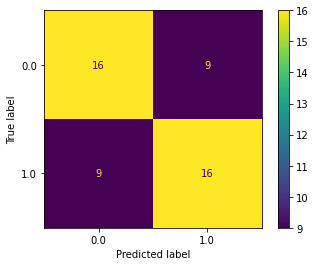

<IPython.core.display.Javascript object>

In [283]:
res = plot_confusion_matrix(lr, X_test, y_test)

<Figure size 1440x720 with 0 Axes>

<BarContainer object of 22 artists>

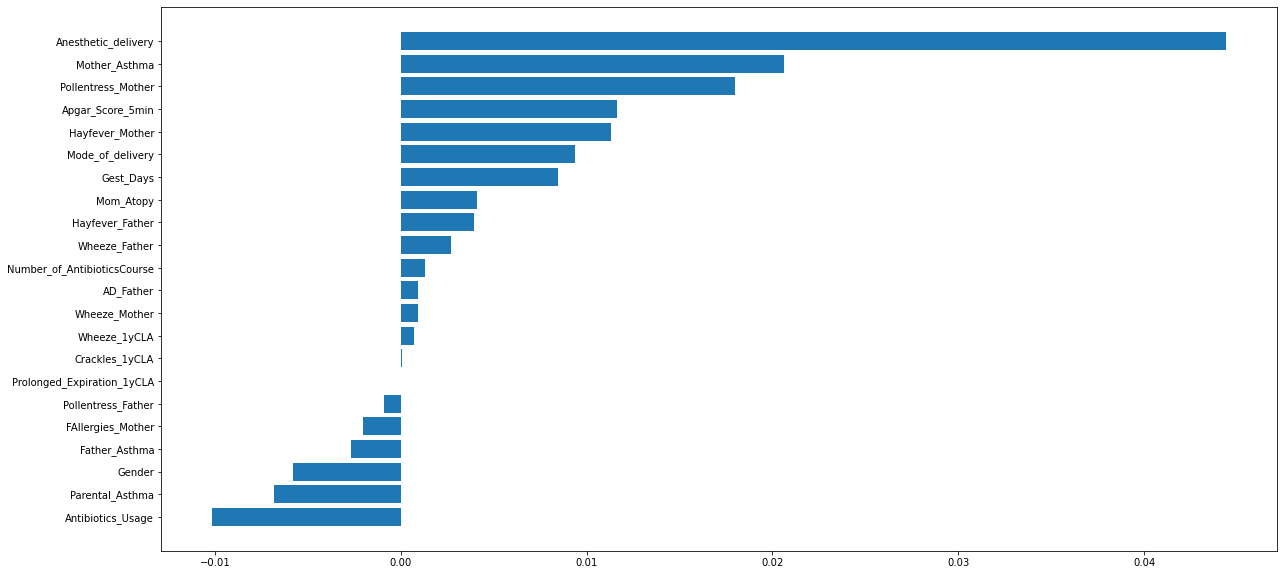

<IPython.core.display.Javascript object>

In [436]:
result = permutation_importance(
    lr, X_train, y_train, n_repeats=10, random_state=1012, scoring="f1"
)

perm_sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(20, 10))
plt.barh(
    width=result.importances_mean[perm_sorted_idx].T, y=X.columns[perm_sorted_idx],
)


imp_features_lr2 = pd.DataFrame(
    data=result.importances_mean.reshape(-1, 1),
    columns=["LR_Permutation_Importance"],
    index=X_test.columns,
)

<Figure size 2400x1600 with 0 Axes>

<AxesSubplot:xlabel='Logistic Regression Coefficient'>

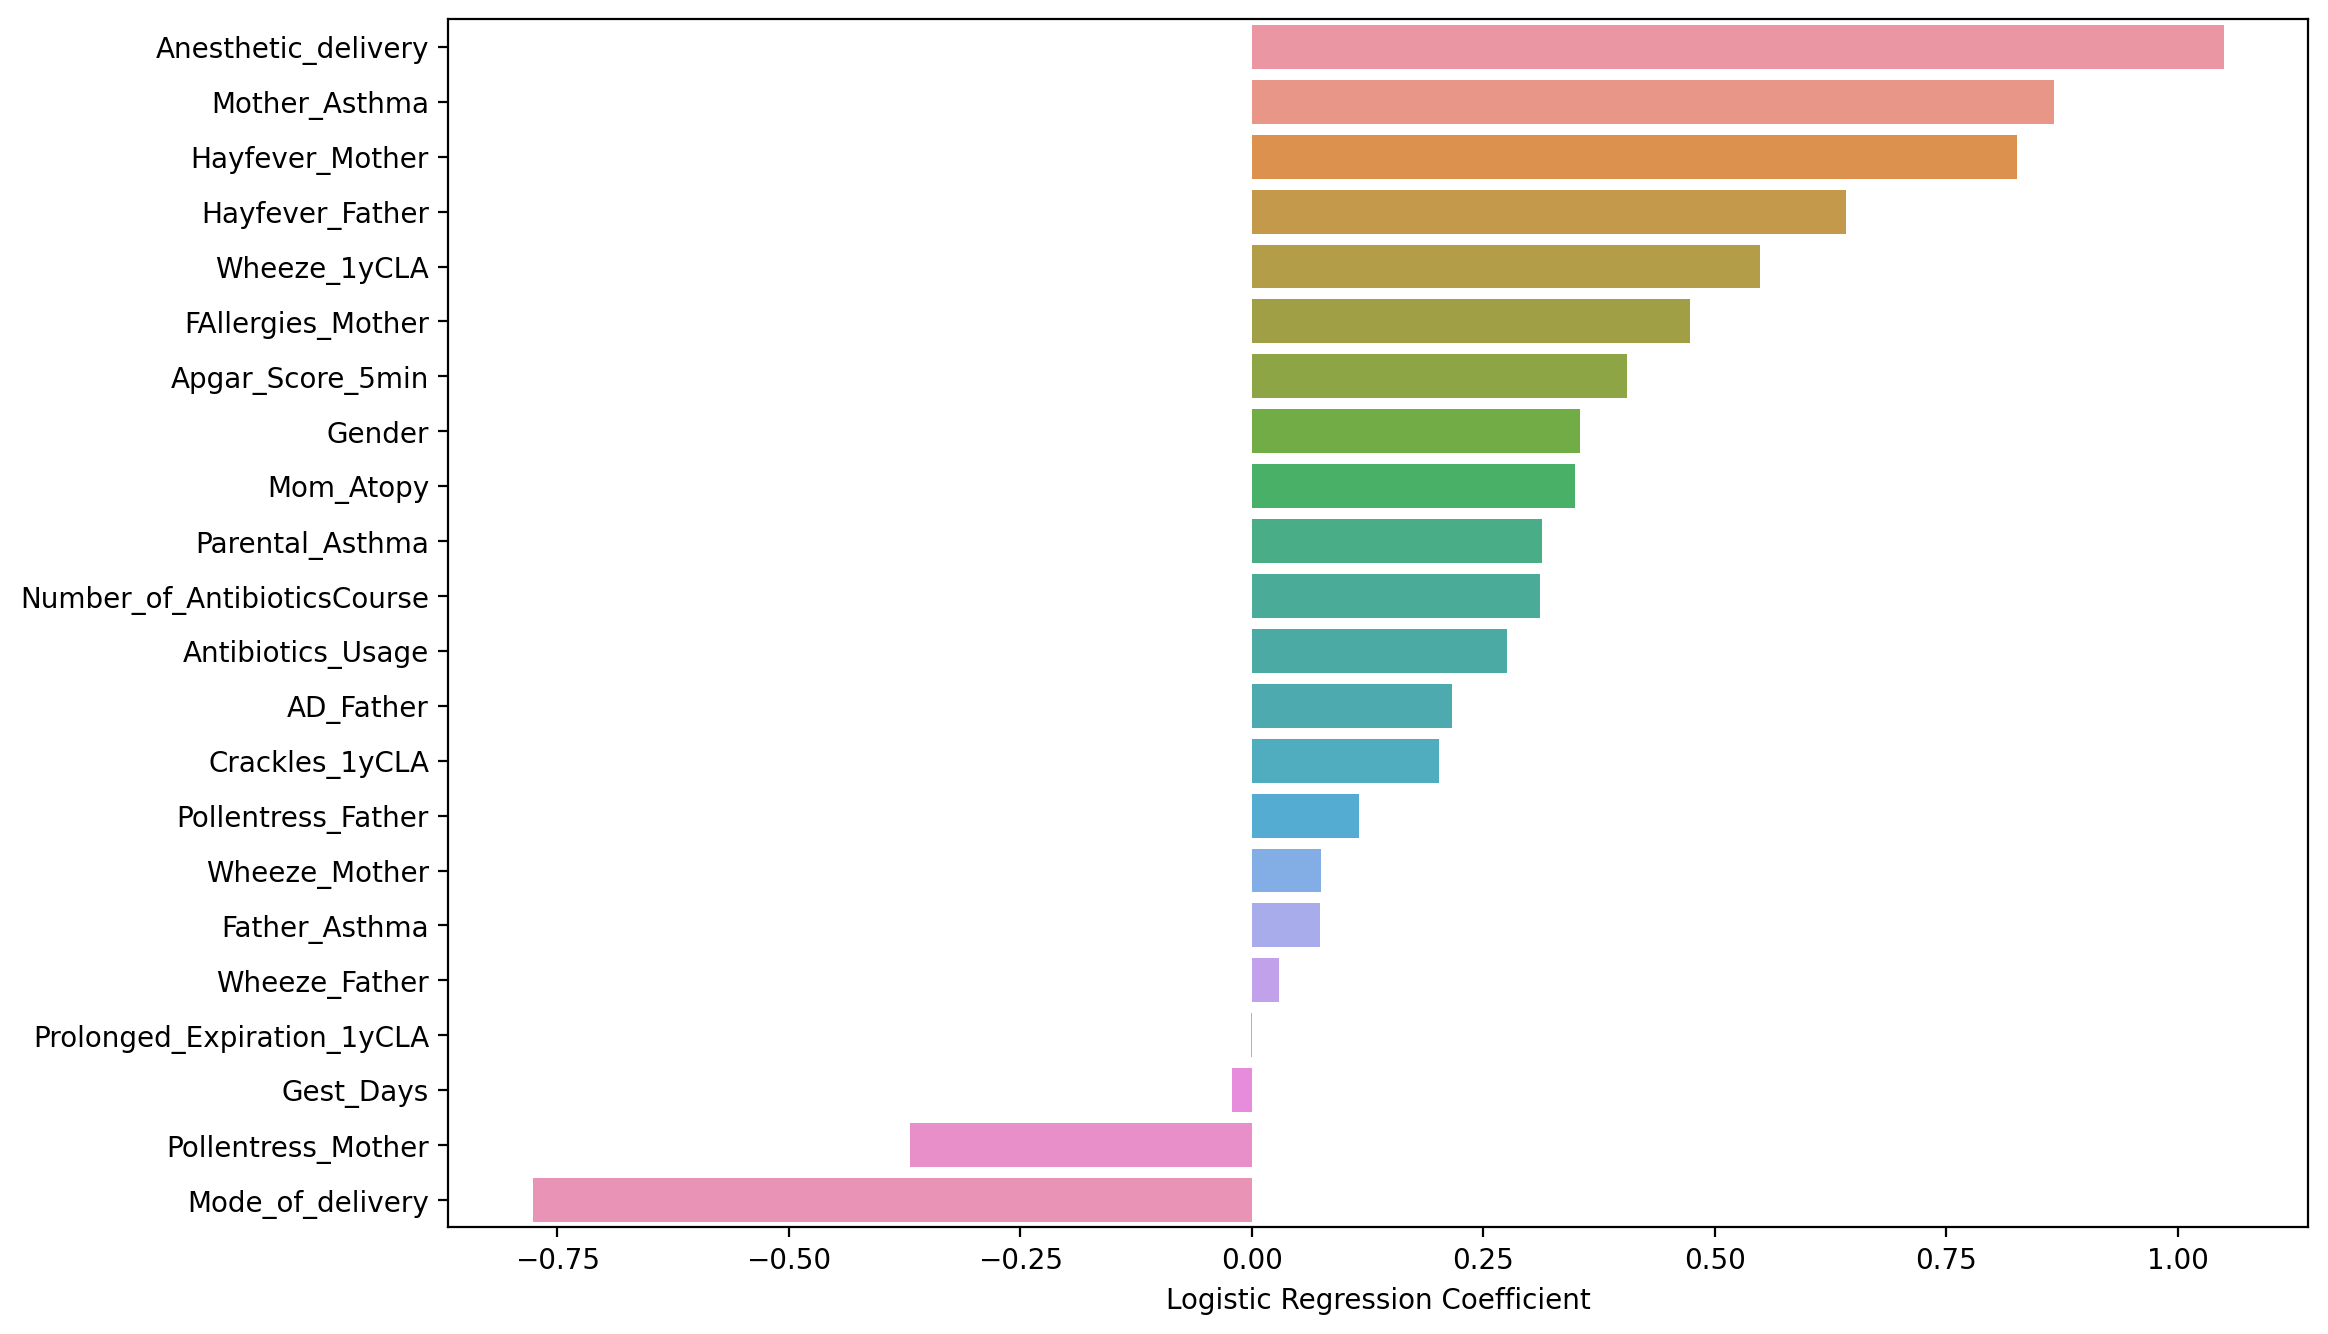

<IPython.core.display.Javascript object>

In [437]:
features_imp = lr.coef_.reshape((-1, 1))
imp_features = pd.DataFrame(
    index=X.columns, data=features_imp, columns=["Logistic Regression Coefficient"]
)
imp_features.sort_values(
    "Logistic Regression Coefficient", ascending=False, inplace=True
)
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(
    data=imp_features,
    y=imp_features.index,
    x=imp_features["Logistic Regression Coefficient"],
)

# Gaussian Naive Bayes

In [214]:
m2 = "Naive Bayes"
nb = GaussianNB()
nb.fit(X_train, y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_prec_score = precision_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Precison of Naive Bayes model:", nb_prec_score * 100, "\n")
print(classification_report(y_test, nbpred))
nb_conf_matrix

GaussianNB()

confussion matrix
[[18  7]
 [ 9 16]]


Precison of Naive Bayes model: 69.56521739130434 

              precision    recall  f1-score   support

         0.0       0.67      0.72      0.69        25
         1.0       0.70      0.64      0.67        25

    accuracy                           0.68        50
   macro avg       0.68      0.68      0.68        50
weighted avg       0.68      0.68      0.68        50



array([[18,  7],
       [ 9, 16]])

<IPython.core.display.Javascript object>

GaussianNB()

confussion matrix
[[18  7]
 [ 9 16]]


Precison of Naive Bayes model: 69.56521739130434 

              precision    recall  f1-score   support

         0.0       0.67      0.72      0.69        25
         1.0       0.70      0.64      0.67        25

    accuracy                           0.68        50
   macro avg       0.68      0.68      0.68        50
weighted avg       0.68      0.68      0.68        50



array([[18,  7],
       [ 9, 16]])

<Figure size 1440x720 with 0 Axes>

<BarContainer object of 22 artists>

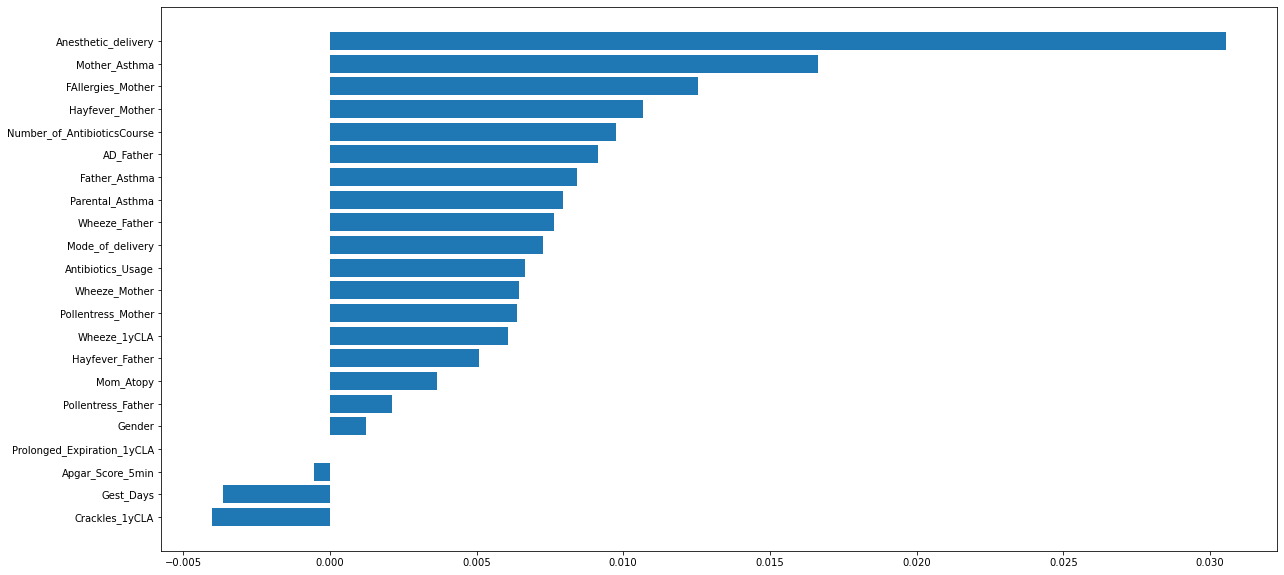

<IPython.core.display.Javascript object>

In [474]:
m2 = "Naive Bayes"
nb = GaussianNB()
nb.fit(X_train, y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_prec_score = precision_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Precison of Naive Bayes model:", nb_prec_score * 100, "\n")
print(classification_report(y_test, nbpred))
nb_conf_matrix


result = permutation_importance(
    nb, X_train, y_train, n_repeats=10, random_state=1012, scoring="f1"
)

perm_sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(20, 10))
plt.barh(
    width=result.importances_mean[perm_sorted_idx].T, y=X.columns[perm_sorted_idx],
)


imp_features_NB = pd.DataFrame(
    data=result.importances_mean.reshape(-1, 1),
    columns=["GaussianNB_Permutation_Importance"],
    index=X_test.columns,
)

In [457]:
lr.coef_.reshape(1, -1)[0]

array([ 3.55034380e-01, -7.75954112e-01,  1.05000059e+00, -9.48156645e-04,
        2.02395241e-01,  5.48863085e-01,  8.66144583e-01,  7.33722333e-02,
        3.14125849e-01,  3.49464330e-01,  7.46805574e-02,  8.27052580e-01,
       -3.69214243e-01,  4.73467138e-01,  2.98914559e-02,  6.42432264e-01,
        2.16333992e-01,  1.16133432e-01,  3.11115287e-01,  2.76195860e-01,
       -2.08320810e-02,  4.05469836e-01])

<IPython.core.display.Javascript object>

In [456]:
result.importances_mean.reshape(1, -1)[0]

array([-5.82001411e-03,  9.39700262e-03,  4.44248687e-02,  0.00000000e+00,
        6.09832096e-05,  7.34024180e-04,  2.06402234e-02, -2.67625795e-03,
       -6.82176197e-03,  4.09946561e-03,  9.29214964e-04,  1.12984127e-02,
        1.80024678e-02, -2.01164528e-03,  2.71907694e-03,  3.96227284e-03,
        9.31564891e-04, -9.13429418e-04,  1.30836287e-03, -1.01568267e-02,
        8.47418284e-03,  1.16443929e-02])

<IPython.core.display.Javascript object>

In [468]:
result.importances_mean.reshape(1, -1)[0]

array([-5.82001411e-03,  9.39700262e-03,  4.44248687e-02,  0.00000000e+00,
        6.09832096e-05,  7.34024180e-04,  2.06402234e-02, -2.67625795e-03,
       -6.82176197e-03,  4.09946561e-03,  9.29214964e-04,  1.12984127e-02,
        1.80024678e-02, -2.01164528e-03,  2.71907694e-03,  3.96227284e-03,
        9.31564891e-04, -9.13429418e-04,  1.30836287e-03, -1.01568267e-02,
        8.47418284e-03,  1.16443929e-02])

<IPython.core.display.Javascript object>

In [469]:
lr.coef_.reshape(1, -1)[0]

array([ 3.55034380e-01, -7.75954112e-01,  1.05000059e+00, -9.48156645e-04,
        2.02395241e-01,  5.48863085e-01,  8.66144583e-01,  7.33722333e-02,
        3.14125849e-01,  3.49464330e-01,  7.46805574e-02,  8.27052580e-01,
       -3.69214243e-01,  4.73467138e-01,  2.98914559e-02,  6.42432264e-01,
        2.16333992e-01,  1.16133432e-01,  3.11115287e-01,  2.76195860e-01,
       -2.08320810e-02,  4.05469836e-01])

<IPython.core.display.Javascript object>

In [462]:
pd.DataFrame(
    [lr.coef_.reshape(1, -1)[0], result.importances_mean.reshape(1, -1)[0]],
    columns=X_test.columns,
    index=["LR", "NB"],
).T.sort_values(by="LR", ascending=False)

,LR,NB
Anesthetic_delivery,1.050001,0.044425
Mother_Asthma,0.866145,0.020640
Hayfever_Mother,0.827053,0.011298
Hayfever_Father,0.642432,0.003962
Wheeze_1yCLA,0.548863,0.000734
FAllergies_Mother,0.473467,-0.002012
Apgar_Score_5min,0.405470,0.011644
Gender,0.355034,-0.005820
Mom_Atopy,0.349464,0.004099
Parental_Asthma,0.314126,-0.006822


<IPython.core.display.Javascript object>

In [439]:
lr.coef_

array([[ 3.55034380e-01, -7.75954112e-01,  1.05000059e+00,
        -9.48156645e-04,  2.02395241e-01,  5.48863085e-01,
         8.66144583e-01,  7.33722333e-02,  3.14125849e-01,
         3.49464330e-01,  7.46805574e-02,  8.27052580e-01,
        -3.69214243e-01,  4.73467138e-01,  2.98914559e-02,
         6.42432264e-01,  2.16333992e-01,  1.16133432e-01,
         3.11115287e-01,  2.76195860e-01, -2.08320810e-02,
         4.05469836e-01]])

<IPython.core.display.Javascript object>

In [438]:
result.importances_mean

array([-5.82001411e-03,  9.39700262e-03,  4.44248687e-02,  0.00000000e+00,
        6.09832096e-05,  7.34024180e-04,  2.06402234e-02, -2.67625795e-03,
       -6.82176197e-03,  4.09946561e-03,  9.29214964e-04,  1.12984127e-02,
        1.80024678e-02, -2.01164528e-03,  2.71907694e-03,  3.96227284e-03,
        9.31564891e-04, -9.13429418e-04,  1.30836287e-03, -1.01568267e-02,
        8.47418284e-03,  1.16443929e-02])

<IPython.core.display.Javascript object>

In [ ]:
model_feature =

In [380]:
# pd.merge(imp_features_lr, imp_features_NB)
res = imp_features_lr.join(imp_features_NB)

<IPython.core.display.Javascript object>

In [386]:
from sklearn.preprocessing import RobustScaler

<IPython.core.display.Javascript object>

In [391]:
# Scaling through normalize the max impact to be 1
for col in res.columns:
    res[col] = res[col] / res[col].max()


<IPython.core.display.Javascript object>

In [394]:
res

,Logistic Regression Coefficient,GaussianNB_Permutation_Importance
Anesthetic_delivery,1.000000,1.000000
Mother_Asthma,0.824899,0.544891
Hayfever_Mother,0.787669,0.349375
Hayfever_Father,0.611840,0.166689
Wheeze_1yCLA,0.522726,0.198910
FAllergies_Mother,0.450921,0.411014
Apgar_Score_5min,0.386162,-0.017606
Gender,0.338128,0.040169
Mom_Atopy,0.332823,0.120069
Parental_Asthma,0.299167,0.259842


<IPython.core.display.Javascript object>

In [398]:
res.rename(
    columns={"Logistic Regression Coefficient": "Logistic_Regression_Coefficient"},
    inplace=True,
)

<IPython.core.display.Javascript object>

In [400]:
res_performance = {}
res_performance["Logistic_Regression_Coefficient"] = 0.6
res_performance["GaussianNB_Permutation_Importance"] = 0.7

<IPython.core.display.Javascript object>

In [426]:
m = [res[col].values * score for col, score in list(res_performance.items())]

<IPython.core.display.Javascript object>

In [427]:
m

[array([ 6.00000000e-01,  4.94939482e-01,  4.72601208e-01,  3.67103944e-01,
         3.13635871e-01,  2.70552498e-01,  2.31696918e-01,  2.02876674e-01,
         1.99693790e-01,  1.79500384e-01,  1.77780064e-01,  1.57826116e-01,
         1.23619354e-01,  1.15654358e-01,  6.63619239e-02,  4.26745801e-02,
         4.19269668e-02,  1.70808223e-02, -5.41803492e-04, -1.19040396e-02,
        -2.10979448e-01, -4.43402099e-01]),
 array([ 0.7       ,  0.38142369,  0.24456285,  0.11668218,  0.13923683,
         0.28771007, -0.01232389,  0.02811837,  0.08404796,  0.18188972,
         0.22376487,  0.15235195,  0.20901447, -0.09203919,  0.04856687,
         0.14747204,  0.19277485,  0.17462129,  0.        , -0.08302574,
         0.14616034,  0.16647887])]

<IPython.core.display.Javascript object>

In [431]:
res["Weighted_importance"] = sum(m)
res["Weighted_importance"] = (
    res["Weighted_importance"] / res["Weighted_importance"].max()
)

<IPython.core.display.Javascript object>

In [433]:
res

,Logistic_Regression_Coefficient,GaussianNB_Permutation_Importance,Weighted_importance
Anesthetic_delivery,1.000000,1.000000,1.000000
Mother_Asthma,0.824899,0.544891,0.674126
Hayfever_Mother,0.787669,0.349375,0.551665
Hayfever_Father,0.611840,0.166689,0.372143
Wheeze_1yCLA,0.522726,0.198910,0.348364
FAllergies_Mother,0.450921,0.411014,0.429433
Apgar_Score_5min,0.386162,-0.017606,0.168748
Gender,0.338128,0.040169,0.177688
Mom_Atopy,0.332823,0.120069,0.218263
Parental_Asthma,0.299167,0.259842,0.277992


<IPython.core.display.Javascript object>

In [403]:
res_performance
res['Weighted_importance'] = res[col] + res[]

{'Logistic_Regression_Coefficient': 0.6,
 'GaussianNB_Permutation_Importance': 0.7}

,Logistic_Regression_Coefficient,GaussianNB_Permutation_Importance
Anesthetic_delivery,1.000000,1.000000
Mother_Asthma,0.824899,0.544891
Hayfever_Mother,0.787669,0.349375
Hayfever_Father,0.611840,0.166689
Wheeze_1yCLA,0.522726,0.198910
FAllergies_Mother,0.450921,0.411014
Apgar_Score_5min,0.386162,-0.017606
Gender,0.338128,0.040169
Mom_Atopy,0.332823,0.120069
Parental_Asthma,0.299167,0.259842


<IPython.core.display.Javascript object>

{'Logistic_Regression_Coefficient': 0.6,
 'GaussianNB_Permutation_Importance': 0.7}

<IPython.core.display.Javascript object>

In [387]:
RobustScaler().fit_transform(res)

array([[ 1.97598555,  3.72896976],
       [ 1.49565341,  1.56938546],
       [ 1.39352379,  0.64162492],
       [ 0.91119487, -0.22526026],
       [ 0.66674116, -0.07236549],
       [ 0.46976584,  0.93411392],
       [ 0.29211981, -1.09977439],
       [ 0.16035491, -0.82562197],
       [ 0.1458029 , -0.44648312],
       [ 0.05347952,  0.21677255],
       [ 0.04561429,  0.50063836],
       [-0.04561429,  0.01654013],
       [-0.20200613,  0.40064742],
       [-0.23842174, -1.64015327],
       [-0.46378462, -0.68700444],
       [-0.57208213, -0.01654013],
       [-0.57550018,  0.2905613 ],
       [-0.68909568,  0.16750083],
       [-0.76966556, -1.01623248],
       [-0.82161321, -1.57905239],
       [-1.73177735, -0.02543195],
       [-2.79440364,  0.11230453]])

<IPython.core.display.Javascript object>

In [384]:
StandardScaler().fit_transform(res)

array([[ 1.98303311,  3.32534686],
       [ 1.51491902,  1.37706971],
       [ 1.41538723,  0.54008703],
       [ 0.94532714, -0.24197672],
       [ 0.70709151, -0.10404211],
       [ 0.51512659,  0.80395709],
       [ 0.34199928, -1.03092295],
       [ 0.21358603, -0.7835953 ],
       [ 0.19940418, -0.44155375],
       [ 0.1094292 ,  0.15680486],
       [ 0.10176403,  0.41289547],
       [ 0.012856  , -0.02383558],
       [-0.13955775,  0.32268826],
       [-0.17504708, -1.51842779],
       [-0.39467747, -0.65854097],
       [-0.50022026, -0.05367906],
       [-0.50355137,  0.22337366],
       [-0.61425738,  0.11235419],
       [-0.69277783, -0.95555529],
       [-0.74340411, -1.4633054 ],
       [-1.63041673, -0.06170085],
       [-2.66601337,  0.06255864]])

<IPython.core.display.Javascript object>

# Random Forest Classfier

In [475]:
m3 = "Random Forest Classfier"
rf = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)
rf.fit(X_train, y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_prec_score = precision_score(y_test, rf_predicted)
rf_auc_score = roc_auc_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Precision of Random Forest:", rf_prec_score * 100, "\n")
print("ROC_AUC of Random Forest:", rf_auc_score * 100, "\n")
print(classification_report(y_test, rf_predicted))

RandomForestClassifier(max_depth=5, n_estimators=20, random_state=12)

confussion matrix
[[19  6]
 [ 9 16]]


Precision of Random Forest: 72.72727272727273 

ROC_AUC of Random Forest: 70.0 

              precision    recall  f1-score   support

         0.0       0.68      0.76      0.72        25
         1.0       0.73      0.64      0.68        25

    accuracy                           0.70        50
   macro avg       0.70      0.70      0.70        50
weighted avg       0.70      0.70      0.70        50



<IPython.core.display.Javascript object>

In [234]:
imp_features_lr = imp_features.copy()

<IPython.core.display.Javascript object>

In [480]:
rf.feature_importances_.reshape(1, -1)[0]

array([0.037796  , 0.03564604, 0.07579091, 0.0009608 , 0.00634096,
       0.00829255, 0.11255951, 0.02150195, 0.04087445, 0.05826009,
       0.04521475, 0.08086824, 0.03559156, 0.05489883, 0.03728384,
       0.03896277, 0.04707622, 0.02596128, 0.04608532, 0.02037521,
       0.12189922, 0.04775949])

<IPython.core.display.Javascript object>

<Figure size 2400x1600 with 0 Axes>

<AxesSubplot:xlabel='importance'>

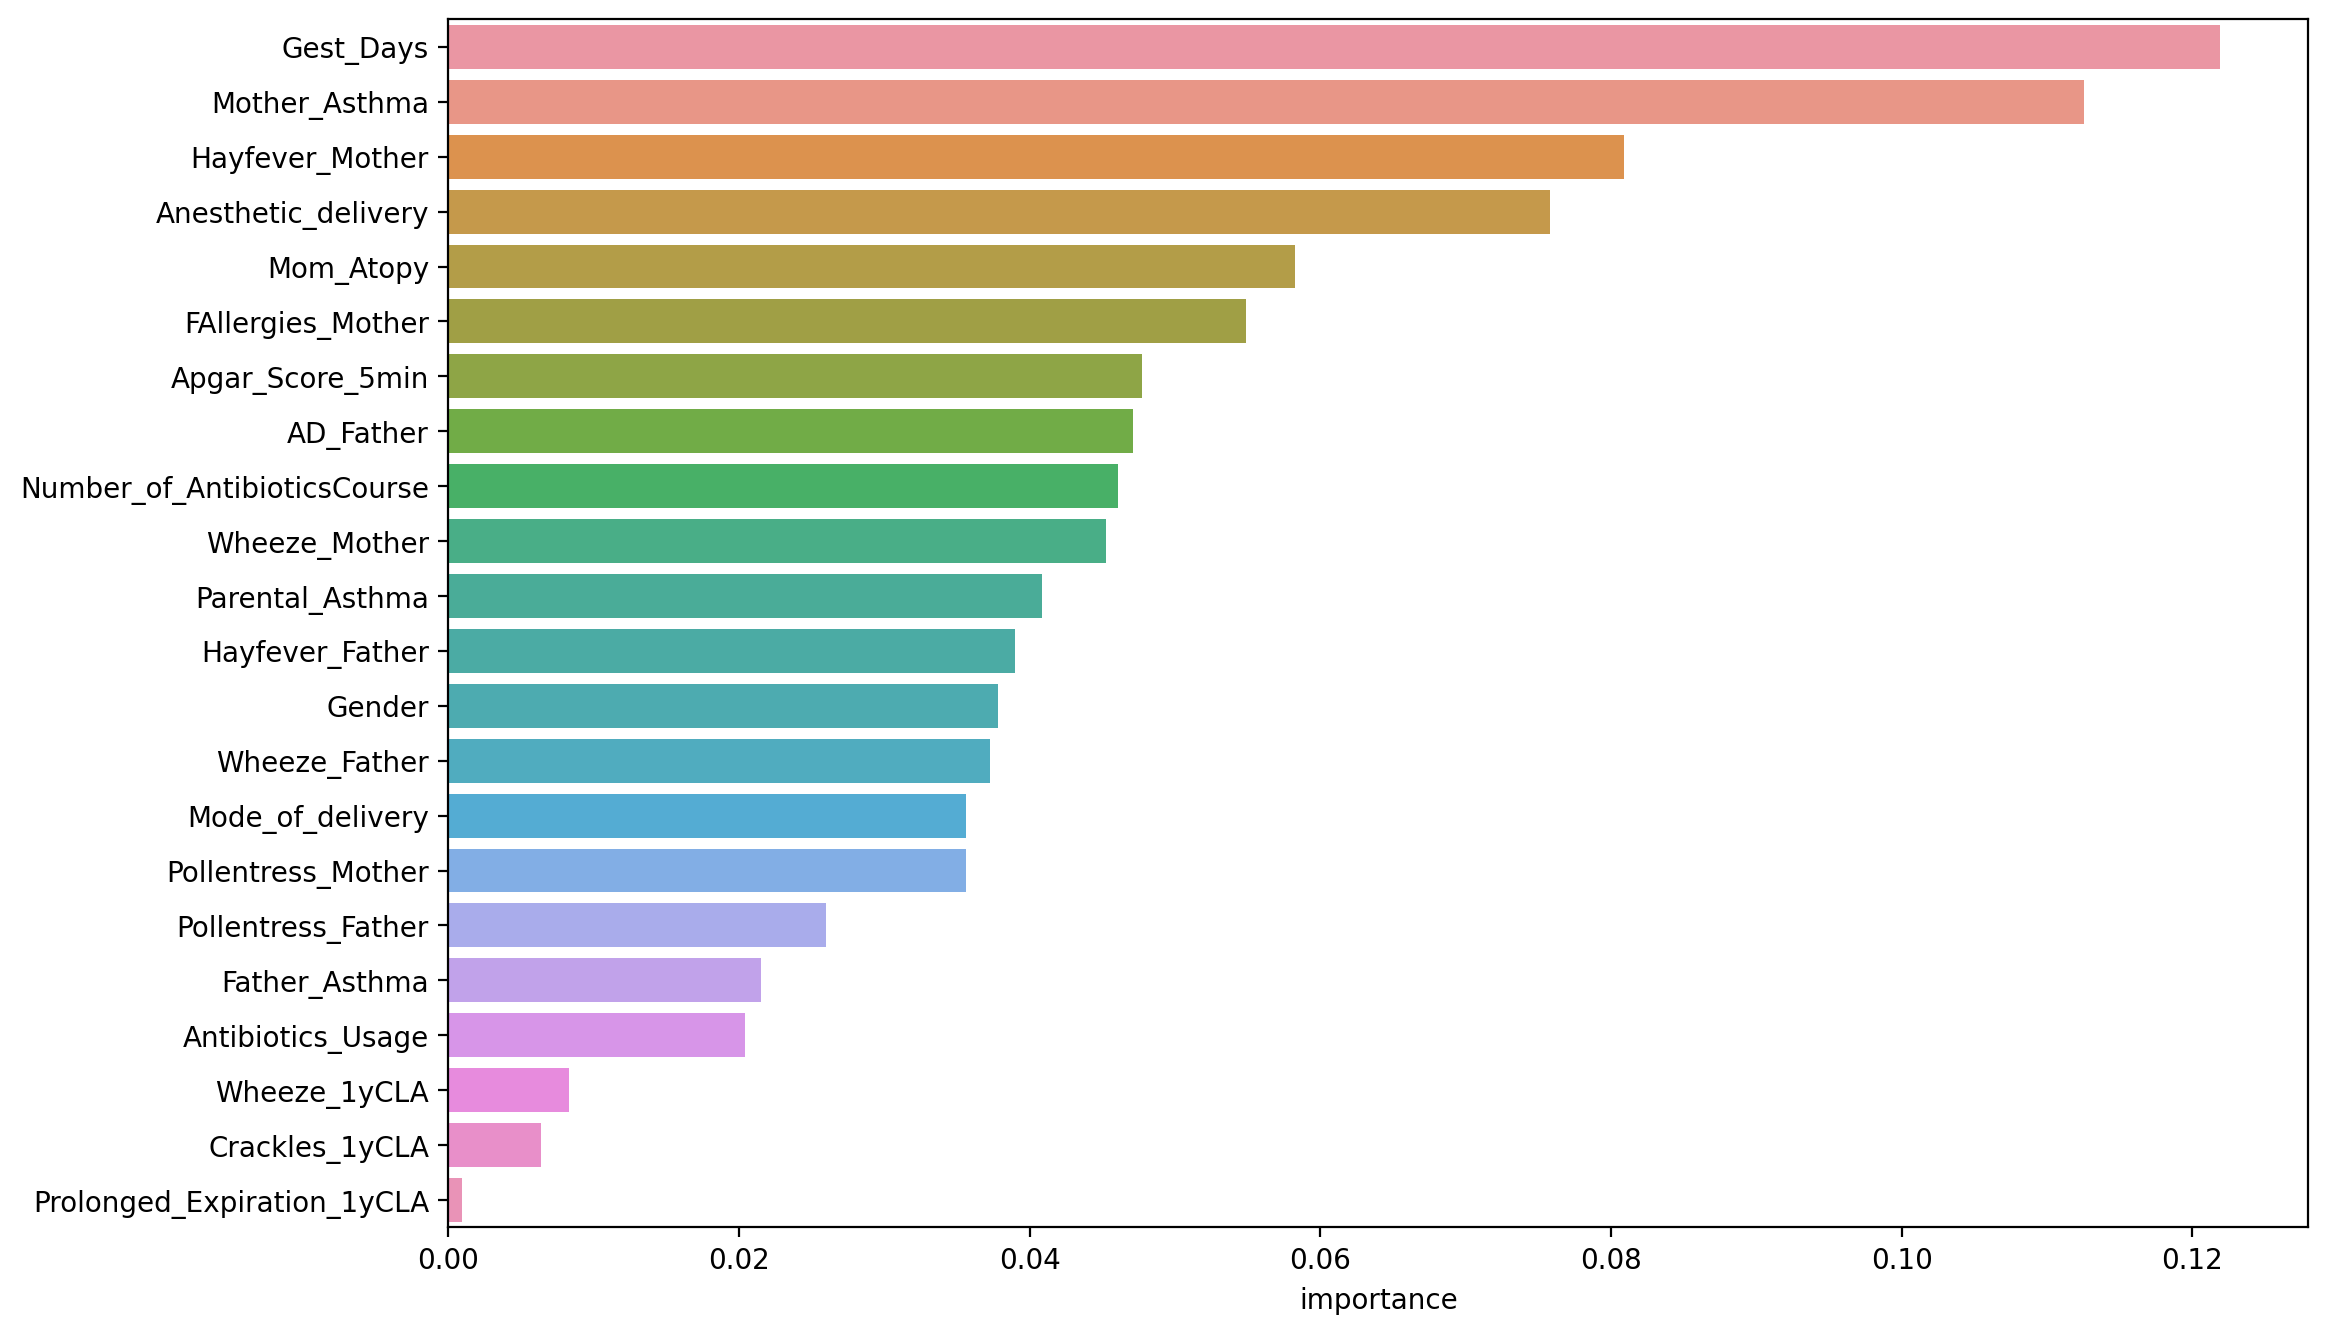

<IPython.core.display.Javascript object>

In [219]:
features_imp = rf.feature_importances_
imp_features = pd.DataFrame(index=X.columns, data=features_imp, columns=["importance"])
imp_features.sort_values("importance", ascending=False, inplace=True)
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(data=imp_features, y=imp_features.index, x=imp_features["importance"])

In [481]:
m4 = "K-NeighborsClassifier"
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_prec_score = precision_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Precison of K-NeighborsClassifier:", knn_prec_score * 100, "\n")
print(classification_report(y_test, knn_predicted))

KNeighborsClassifier(n_neighbors=12)

confussion matrix
[[18  7]
 [15 10]]


Precison of K-NeighborsClassifier: 58.82352941176471 

              precision    recall  f1-score   support

         0.0       0.55      0.72      0.62        25
         1.0       0.59      0.40      0.48        25

    accuracy                           0.56        50
   macro avg       0.57      0.56      0.55        50
weighted avg       0.57      0.56      0.55        50



<IPython.core.display.Javascript object>

In [ ]:
knn.

In [264]:
mm = "55"

<IPython.core.display.Javascript object>

In [274]:
scoring = "f1_score"

<IPython.core.display.Javascript object>

In [275]:
vars()[scoring]

<function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

<IPython.core.display.Javascript object>

In [221]:
m5 = "DecisionTreeClassifier"
dt = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_prec_score = precision_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Precison of DecisionTreeClassifier:", dt_prec_score * 100, "\n")
print(classification_report(y_test, dt_predicted))

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

confussion matrix
[[22  3]
 [16  9]]


Precison of DecisionTreeClassifier: 75.0 

              precision    recall  f1-score   support

         0.0       0.58      0.88      0.70        25
         1.0       0.75      0.36      0.49        25

    accuracy                           0.62        50
   macro avg       0.66      0.62      0.59        50
weighted avg       0.66      0.62      0.59        50



<IPython.core.display.Javascript object>

In [210]:
m6 = "Support Vector Classifier"
svc = SVC(kernel="rbf", C=6)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_prec_score = precision_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Precison of Support Vector Classifier:", svc_prec_score * 100, "\n")
print(classification_report(y_test, svc_predicted))

SVC(C=6)

confussion matrix
[[21  4]
 [17  8]]


Precison of Support Vector Classifier: 66.66666666666666 

              precision    recall  f1-score   support

         0.0       0.55      0.84      0.67        25
         1.0       0.67      0.32      0.43        25

    accuracy                           0.58        50
   macro avg       0.61      0.58      0.55        50
weighted avg       0.61      0.58      0.55        50



<IPython.core.display.Javascript object>

In [222]:
m7 = "Extreme Gradient Boost"
xgb = XGBClassifier(
    learning_rate=0.01,
    n_estimators=25,
    max_depth=15,
    gamma=0.6,
    subsample=0.52,
    colsample_bytree=0.6,
    seed=27,
    reg_lambda=2,
    booster="dart",
    colsample_bylevel=0.6,
    colsample_bynode=0.5,
)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_prec_score = precision_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Precison of Extreme Gradient Boost:", xgb_prec_score * 100, "\n")
print(classification_report(y_test, xgb_predicted))

[10:07:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=0.6,
              colsample_bynode=0.5, colsample_bytree=0.6, gamma=0.6, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=25, n_jobs=8, num_parallel_tree=1, random_state=27,
              reg_alpha=0, reg_lambda=2, scale_pos_weight=1, seed=27,
              subsample=0.52, tree_method='exact', validate_parameters=1,
              verbosity=None)

confussion matrix
[[17  8]
 [10 15]]


Precison of Extreme Gradient Boost: 65.21739130434783 

              precision    recall  f1-score   support

         0.0       0.63      0.68      0.65        25
         1.0       0.65      0.60      0.63        25

    accuracy                           0.64        50
   macro avg       0.64      0.64      0.64        50
weighted avg       0.64      0.64      0.64        50



<IPython.core.display.Javascript object>

<Figure size 2400x1600 with 0 Axes>

<AxesSubplot:xlabel='importance'>

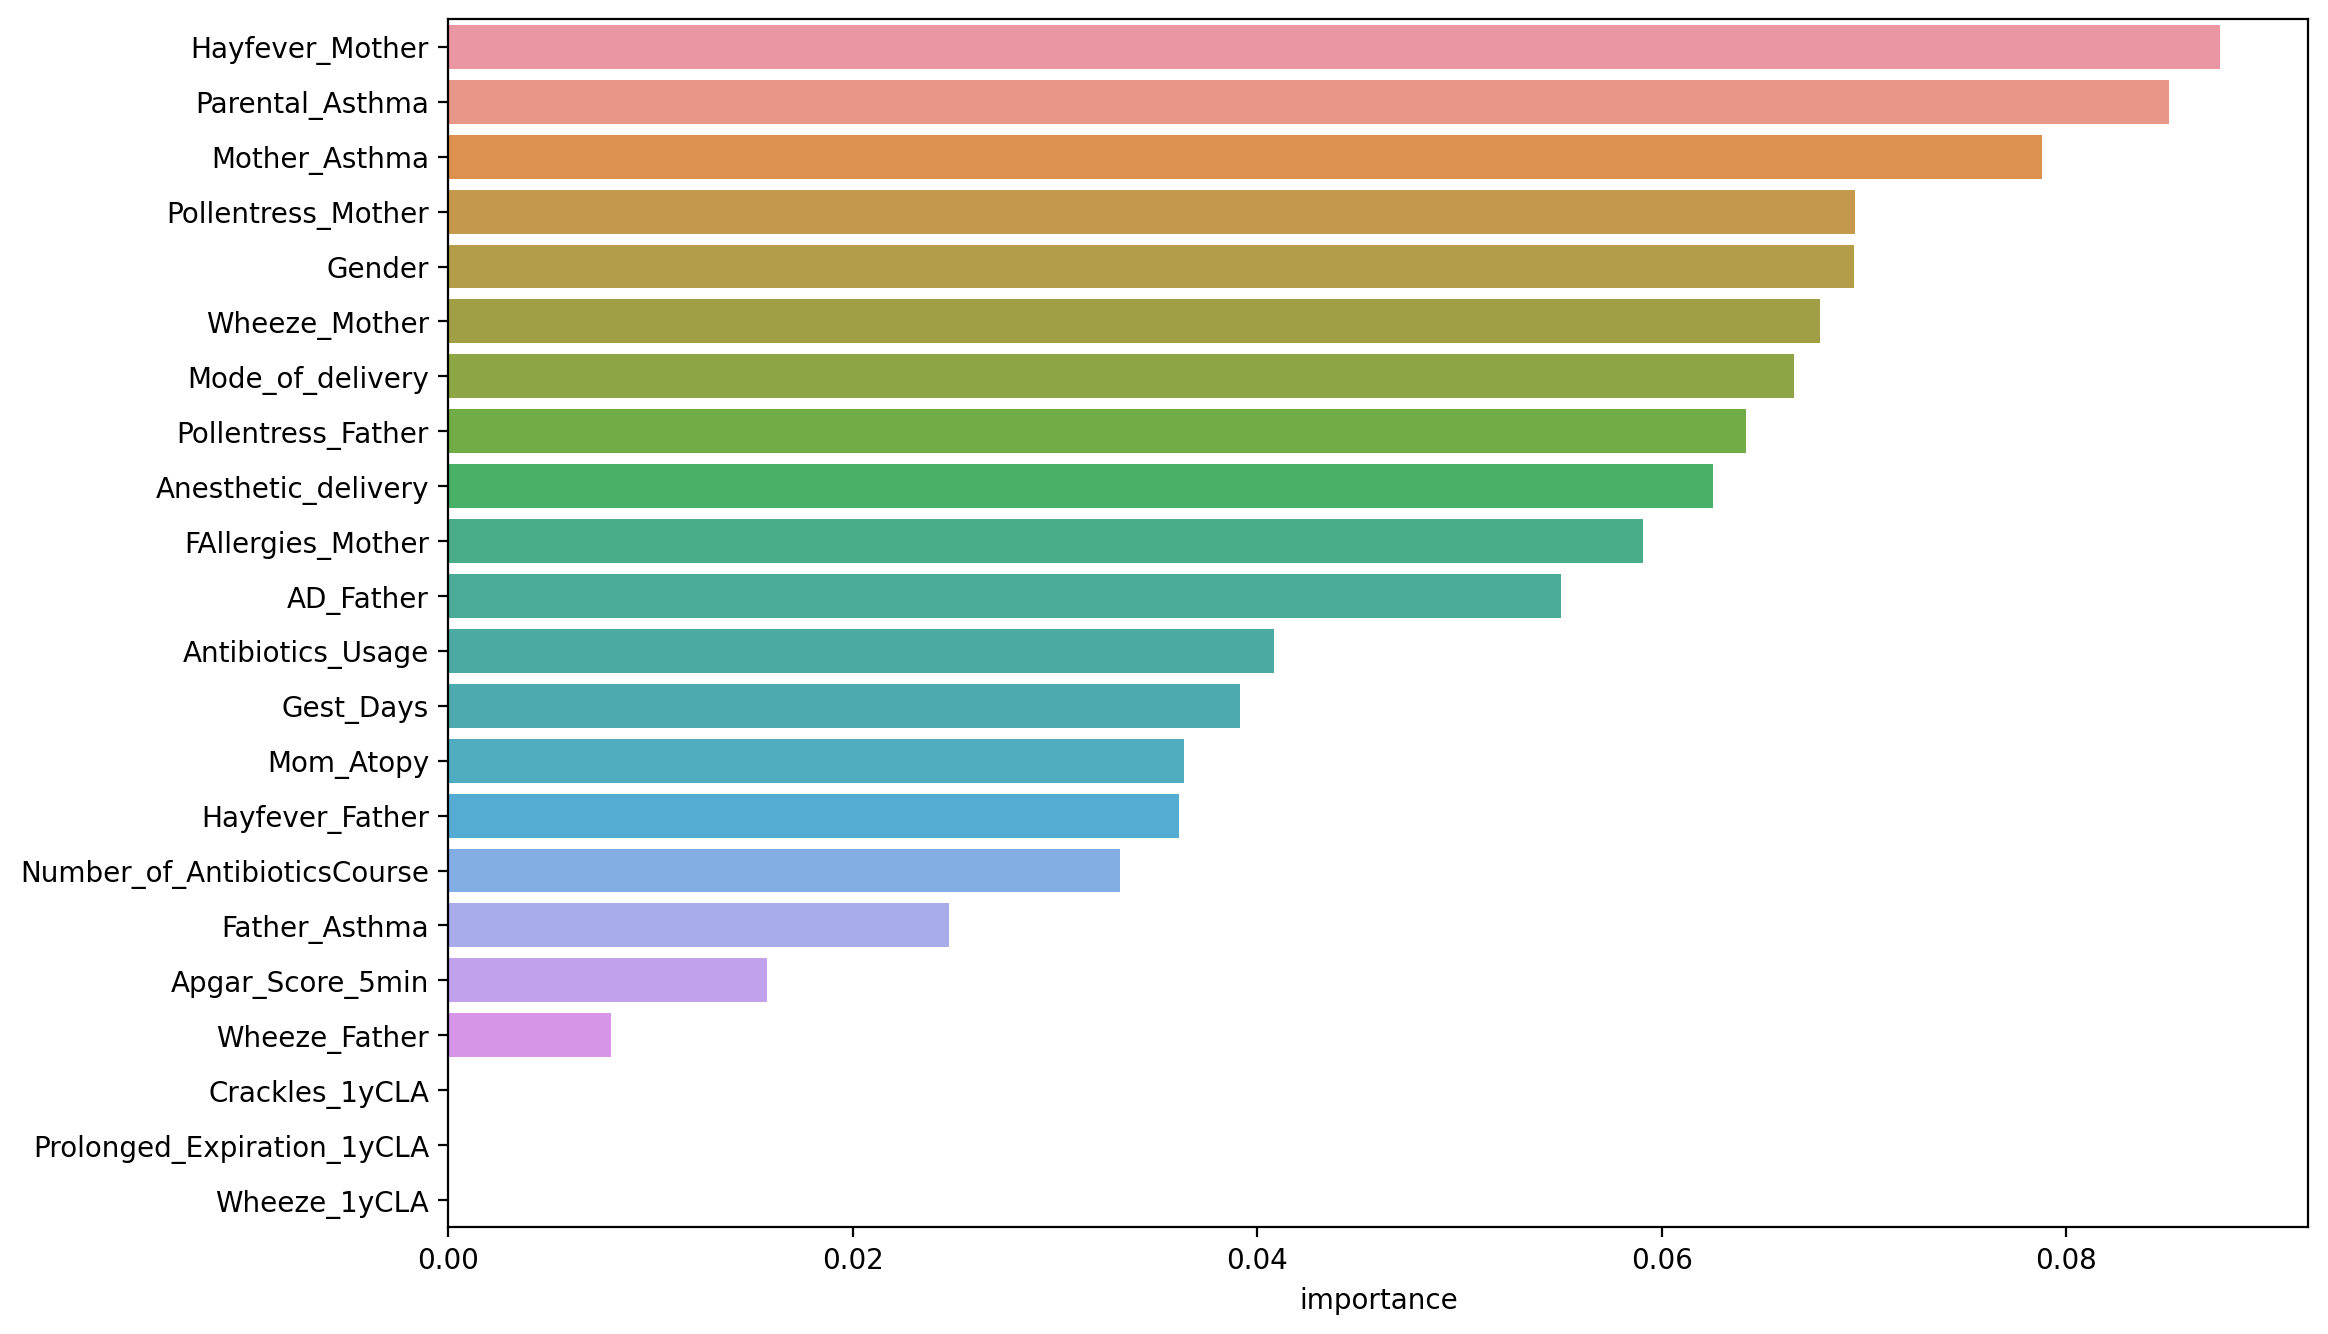

<IPython.core.display.Javascript object>

In [223]:
features_imp = xgb.feature_importances_
imp_features = pd.DataFrame(index=X.columns, data=features_imp, columns=["importance"])
imp_features.sort_values("importance", ascending=False, inplace=True)
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(data=imp_features, y=imp_features.index, x=imp_features["importance"])

In [224]:
model_ev = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression",
            "Naive Bayes",
            "Random Forest",
            "K-Nearest Neighbour",
            "Decision Tree",
            "Support Vector Machine",
            "Extreme Gradient Boost",
        ],
        "Precison": [
            lr_prec_score * 100,
            nb_prec_score * 100,
            rf_prec_score * 100,
            knn_prec_score * 100,
            dt_prec_score * 100,
            svc_prec_score * 100,
            xgb_prec_score * 100,
        ],
    }
)
model_ev.sort_values(by="Precison", ascending=False)

,Model,Precison
3,K-Nearest Neighbour,80.000000
4,Decision Tree,75.000000
2,Random Forest,72.727273
1,Naive Bayes,69.565217
5,Support Vector Machine,66.666667
6,Extreme Gradient Boost,65.217391
0,Logistic Regression,64.000000


<IPython.core.display.Javascript object>

In [114]:
from collections import defaultdict

score_dict = defaultdict(list)

models = [lr, nb, rf, knn, dt, svc, xgb]
model_names = [
    "Logistic Regression",
    "Naive Bayes",
    "Random Forest",
    "K-Nearest Neighbour",
    "Decision Tree",
    "Support Vector Machine",
    "Extreme Gradient Boost",
]
measurements = [accuracy_score, f1_score, precision_score, recall_score, roc_auc_score]
measurement_names = ["Accuracy", "F1 score", "Precision", "Recall", "AUC"]

for i in range(len(models)):
    score_dict["Model"].append(model_names[i])
    for j in range(len(measurements)):
        score_dict[measurement_names[j]].append(
            measurements[j](y_test, models[i].predict(X_test))
        )

score_df = pd.DataFrame(score_dict)
score_df = score_df.set_index("Model")
score_df.style.background_gradient(cmap="Greens")

,Accuracy,F1 score,Precision,Recall,AUC
Model,,,,,
Logistic Regression,0.700000,0.705882,0.692308,0.720000,0.700000
Naive Bayes,0.660000,0.564103,0.785714,0.440000,0.660000
Random Forest,0.680000,0.692308,0.666667,0.720000,0.680000
K-Nearest Neighbour,0.720000,0.681818,0.789474,0.600000,0.720000
Decision Tree,0.580000,0.588235,0.576923,0.600000,0.580000
Support Vector Machine,0.640000,0.526316,0.769231,0.400000,0.640000
Extreme Gradient Boost,0.700000,0.716981,0.678571,0.760000,0.700000


<IPython.core.display.Javascript object>

In [366]:
# Run various models
def ml_run(
    X_train, X_test, y_train, y_test, scoring_func=f1_score, importance_scoring="f1"
):
    """
    ML run for a myriad of ML models for predictive modelling and views results
    
    :param scoring_func: a predefined function, default: f1_score
        model_scoring has to be one of accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
        since it must have the same name of sklearn.metrics functions

    :param importance_scoring: string, default: f1
        importance_scoring has to be one of 'accuracy', 'f1', 'precision', 'recall', 'roc_auc',
        since it must be recognizable as a parameter to be put into permutation importance

    :return: Confusion matrix dataframe, model performance, feature importance
    """
    # A dictionary that will store the performance score of models to evaluate feature importance
    model_score = {}
    
    # A dictionary that will store the confusion matrix results as string to easy comparision
    model_cm = {}
    
    # ---------------------------------------------------------------------------
    # Logistic Regression
    # ---------------------------------------------------------------------------
    model_lr = "Logistic_Regression"
    lr = LogisticRegression()
    lr.fit(X_train, y_train)    
    predicted = lr.predict(X_test)
    
    model_score[model_lr] = scoring_func(y_test, predicted)
    model_cm[model_lr] = str(
            {
                k: dict(v)
                for k, v in dict(
                    pd.DataFrame(
                        confusion_matrix(y_test, predicted),
                        columns=["Pred_0", "Pred_1"],
                        index=["True_0", "True_1"],
                    )
                ).items()
            }
        )    

    print(f"confussion matrix: {confusion_matrix(y_test, predicted)}\n")
    print(f"The performance score of Logistic Regression: {model_score[model_lr] * 100} \n")
    print(classification_report(y_test, lr_predict))

    # Define feature importance matrix - for lr 
    imp_features_lr = pd.DataFrame(
        data=lr.coef_.reshape((-1, 1)),
        index=X.columns,
        columns=[model_lr],
    )

    # Only for visualization of feature importance
    imp_features_lr.sort_values(
        model_lr, ascending=False, inplace=True
    )
    plt.figure(figsize=(12, 8), dpi=200)
    sns.barplot(
        data=imp_features_lr,
        y=imp_features_lr.index,
        x=imp_features_lr[model_lr],
    )
    
    
    # ---------------------------------------------------------------------------
    # Logistic Regression
    # ---------------------------------------------------------------------------

<IPython.core.display.Javascript object>

confussion matrix: [[16  9]
 [ 9 16]]

The performance score of Logistic Regression: 64.0 

              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64        25
         1.0       0.64      0.64      0.64        25

    accuracy                           0.64        50
   macro avg       0.64      0.64      0.64        50
weighted avg       0.64      0.64      0.64        50



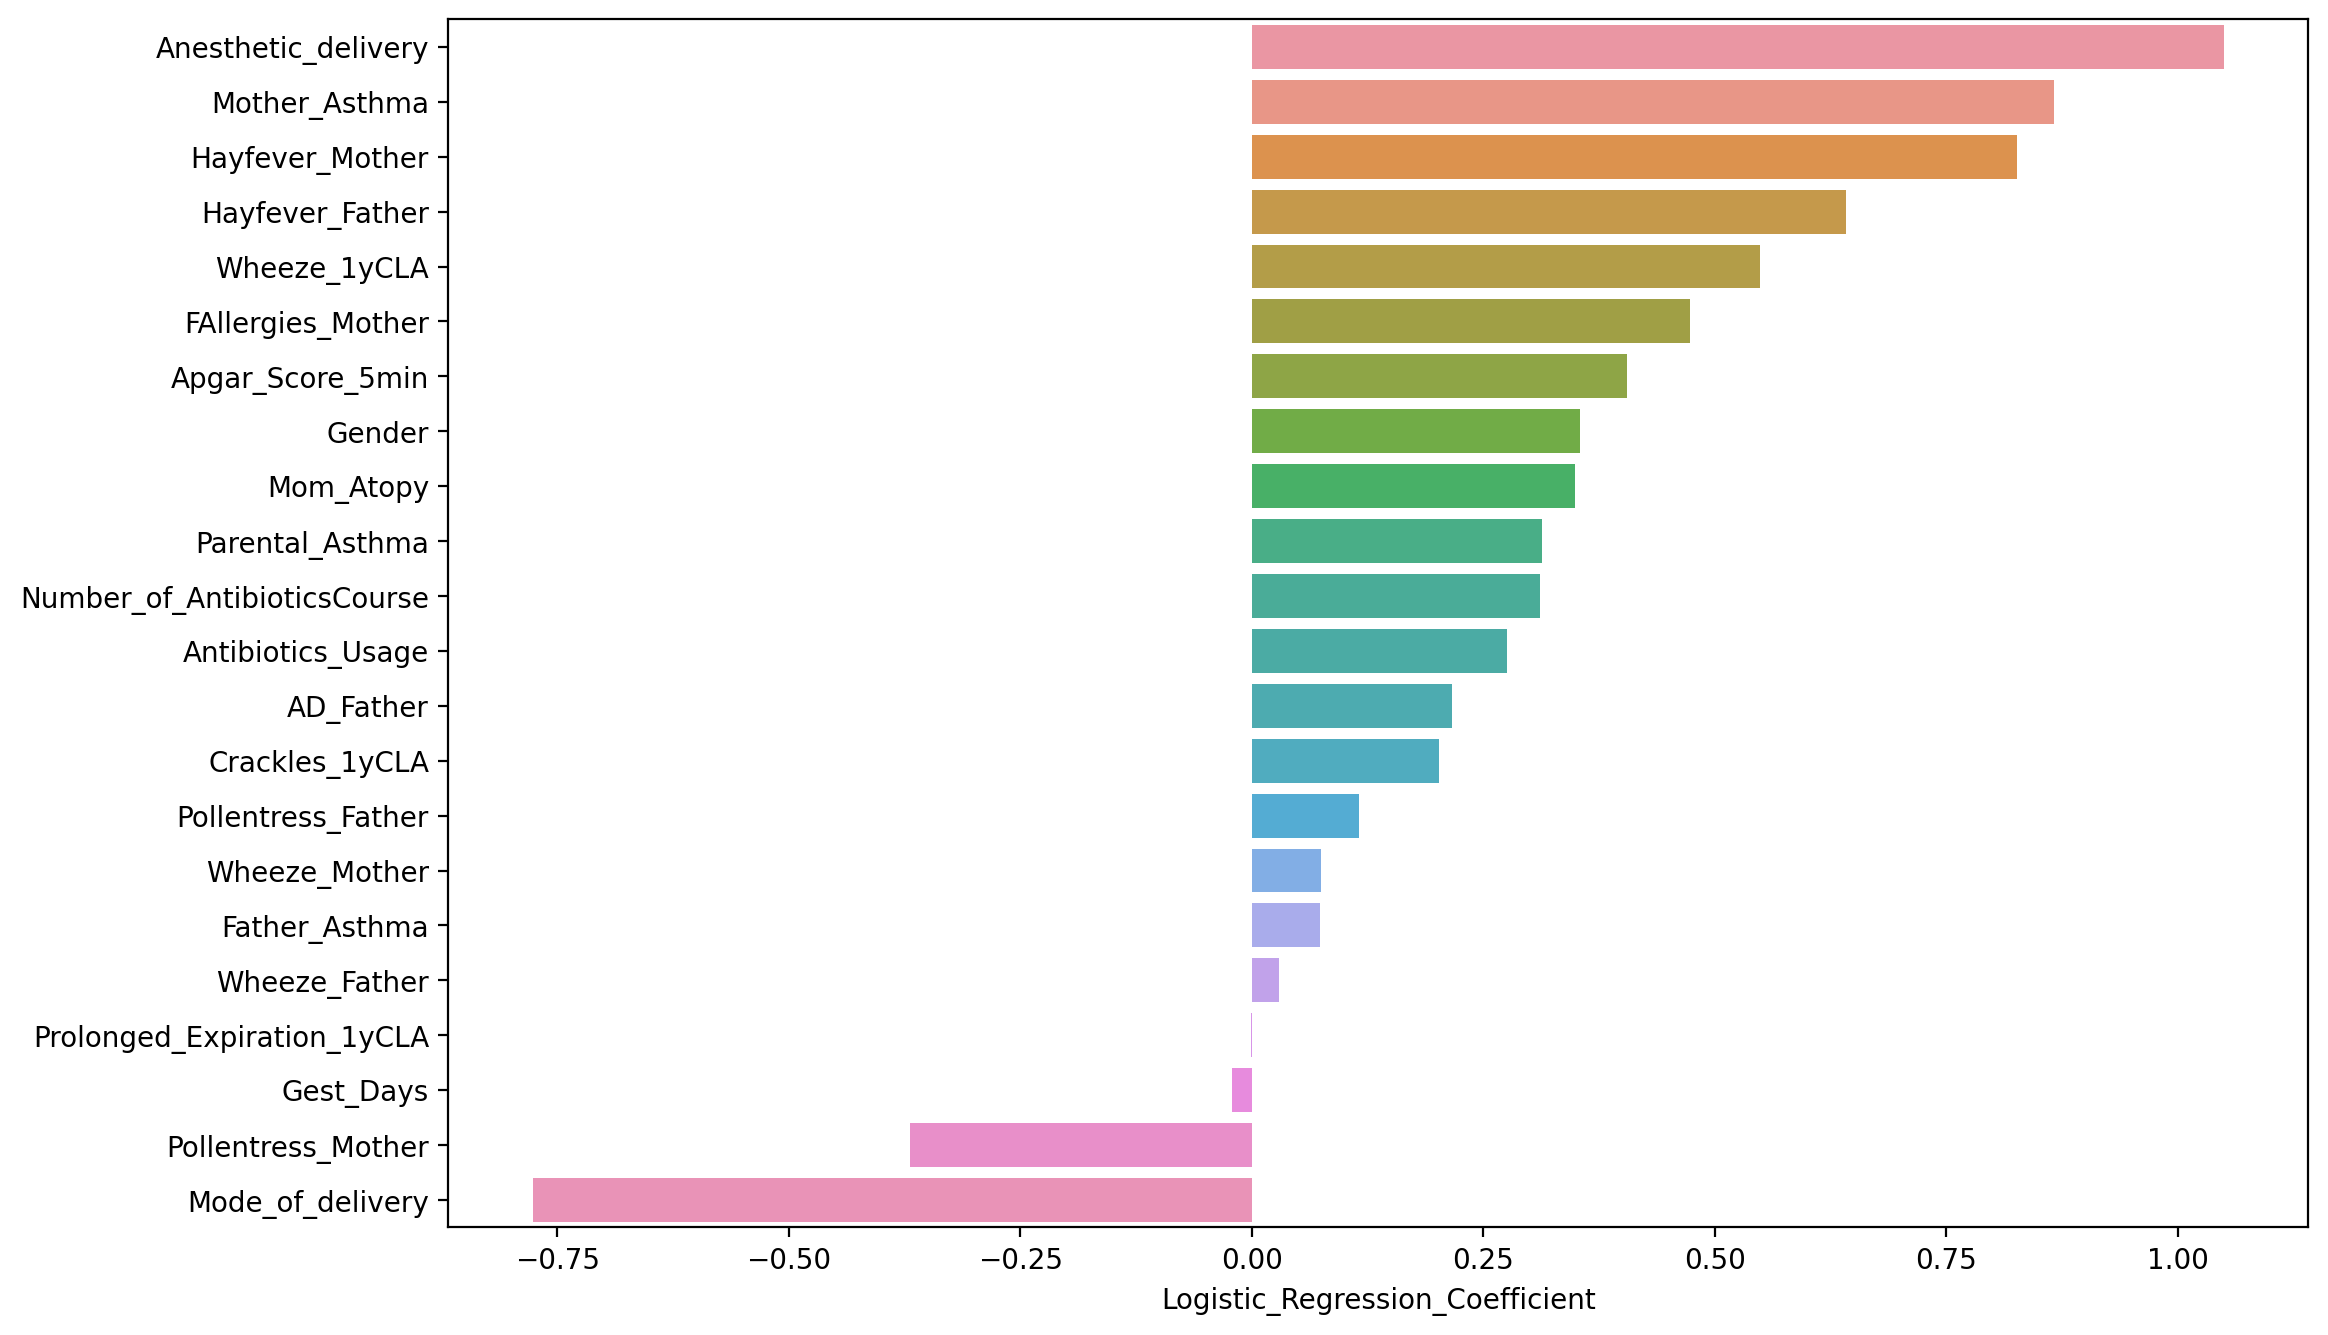

<IPython.core.display.Javascript object>

In [367]:
ml_run(X_train, X_test, y_train, y_test, scoring_func=f1_score, importance_scoring="f1")

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    roc_curve,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)

dict_values(['Subject_Number', 'Wheeze_Mother', 'Asthma_Mother', 'Hayfever_Mother', 'AD_Mother', 'Pollentress_Mother', 'FAllergies_Mother', 'Wheeze_Father', 'Asthma_Father', 'Hayfever_Father', 'AD_Father', 'Pollentress_Father', 'FAllergies_Father'])

<IPython.core.display.Javascript object>

### 1. Previous 1y -> 5y prediction

In [2]:
# Preferences of autoformatting & Multiple Output
%load_ext nb_black
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
# Preferences - II
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import numpy as np

<IPython.core.display.Javascript object>

#### 1.1 Prepare dataset

In [6]:
!ls

CHILD_Asthma_Prediction_Modelling.ipynb CHILD_ml_pipeline.ipynb
CHILD_ML.ipynb


<IPython.core.display.Javascript object>